In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask 

m = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/base_model_mars/run*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
pm = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Paleo_mars_1/run*/atmos_daily.nc', 
                      decode_times=False, concat_dim='time',combine='nested')
pm_CO2 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Paleo_mars_CO2_80/run*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
pm_CH4 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Paleo_mars_CH4_1/run*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
pm_CO2_CH4 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Paleo_mars_CO2_80_CH4_1/run*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

set =[m, pm, pm_CO2, pm_CH4, pm_CO2_CH4]
nameset = [['Mars', 'Paleomars', 'Paleomars (80% CO2)', 'Paleomars (1% CH4)', 'Paleomars (Both)'], set]


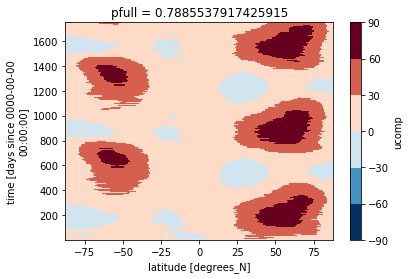

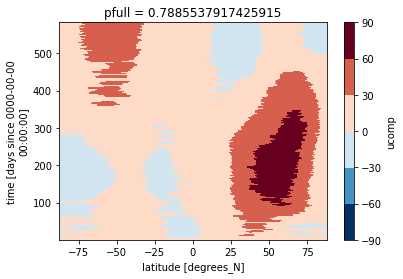

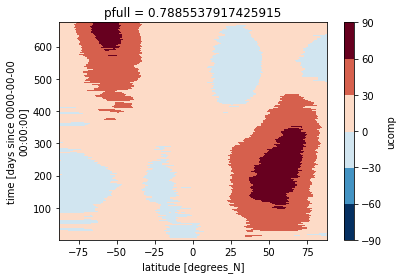

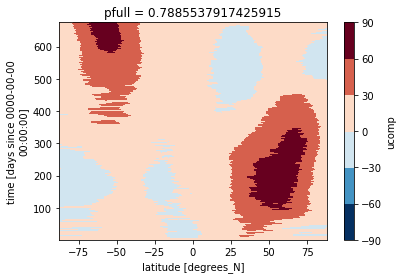

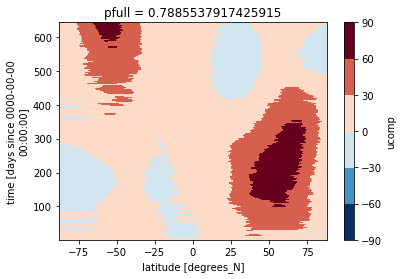

In [3]:
for x in set:
    u_1hPa = x.ucomp.sel(pfull=1, method='nearest').mean(dim='lon')
    u_1hPa.plot.contourf()
    plt.show()

Starting Temperature - (Mars) 283.89
Starting Temperature - (Paleomars) 283.89
Starting Temperature - (Paleomars (80% CO2)) 283.88
Starting Temperature - (Paleomars (1% CH4)) 283.89
Starting Temperature - (Paleomars (Both)) 283.88


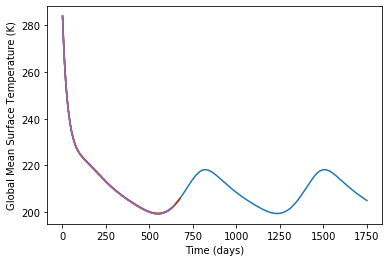

In [54]:
i=0
for x in set:
    y=nameset[0][i]
    cos_lat_2d = np.cos(np.deg2rad(x.lat)) * xr.ones_like(x.lon) 
    gmst = ((x.t_surf * cos_lat_2d).sum(dim=['lat','lon']) / cos_lat_2d.sum(dim=['lat','lon']))
    print('Starting Temperature - ('+y+')', "%.2f" % gmst.values.max())
    plt.plot(gmst.time, gmst.values)
    plt.xlabel("Time (days)")
    plt.ylabel("Global Mean Surface Temperature (K)")
    i+=1
plt.show()

Mars


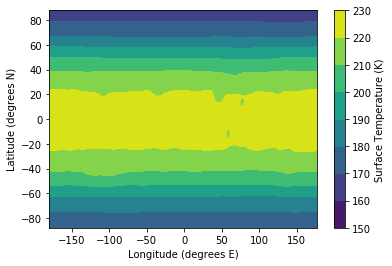

Paleomars


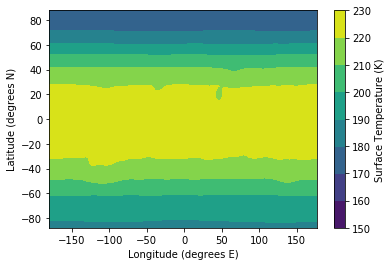

Paleomars (80% CO2)


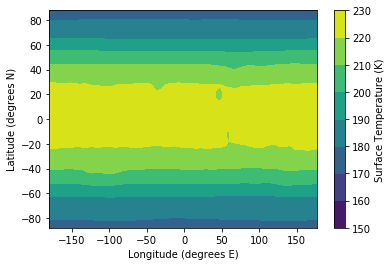

Paleomars (1% CH4)


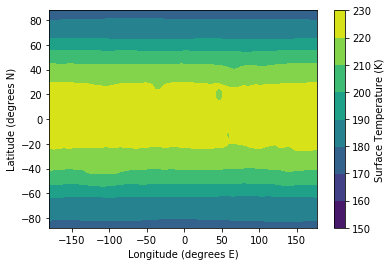

Paleomars (Both)


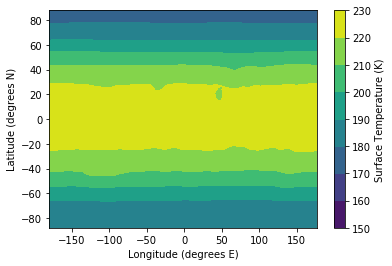

In [60]:
# da_t_surf_spun=da.t_surf[da.t_surf.time>S] #Only takes annual data not spin up data
# da_t_surf_annual = da_t_surf_spun[da_t_surf_spun.time < L]

i=0
for x in set:
    y=nameset[0][i]
    print(y)
    t_surf=x.t_surf.mean(dim='time')
    X=t_surf.lon.values -180
    Y=t_surf.lat.values
    Z=t_surf.values

    CS=plt.contourf(X, Y, Z, levels=[150,160,170,180,190,200,210,220,230])
    plt.xlabel('Longitude (degrees E)')
    plt.ylabel('Latitude (degrees N)')
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('Surface Temperature (K)')
    plt.show()
    i+=1


#     print(Z.max(), Z.min())
